In [10]:
import random 
import time 

class Connection:
    def __init__(self, name):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.weight = 1  # Default weight
        self.active_sessions = 0

    def start_session(self):
        self.active_sessions += 1
        self.update_qos_metrics()

    def end_session(self):
        self.active_sessions -= 1
        self.update_qos_metrics()

    def update_qos_metrics(self):
        # Add logic here to update latency, packet_loss, signal_strength
        # For example, increase latency and packet_loss, decrease signal_strength as more sessions are active
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions

    def is_unhealthy(self):
        # Define the criteria for unhealthy status
        return self.latency > 80 or self.packet_loss > 20 or self.signal_strength < 20

    def check_health(self):
        # Update QoS metrics and check health status
        self.update_qos_metrics()
        return not self.is_unhealthy()


class LoadBalancer:
    def __init__(self):
        self.connections = []
        self.connection_index = 0

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection

    def calculate_qos_score(self, connection):
        return connection.latency + connection.packet_loss - connection.signal_strength

    def start_session(self):
        # Use weighted round-robin mechanism
        for _ in range(len(self.connections)):
            connection = self.connections[self.connection_index]
            self.connection_index = (self.connection_index + 1) % len(self.connections)
            
            if connection.check_health():
                connection.start_session()
                print(f"Started session on {connection.name}")
                break
        else:
            print("No healthy connections available.")

    def end_session(self, connection_name):
        for connection in self.connections:
            if connection.name == connection_name:
                connection.end_session()
                print(f"Ended session on {connection.name}")
                break
                
    def monitor_connections(self):
        for connection in self.connections:
            print(f"Monitoring {connection.name}: "
                  f"Latency: {connection.latency} ms, "
                  f"Packet Loss: {connection.packet_loss}%, "
                  f"Signal Strength: {connection.signal_strength}, "
                  f"Active Sessions: {connection.active_sessions}")

            if connection.is_unhealthy():
                print(f"{connection.name} is unhealthy!")
                # Maybe add some logic to end sessions or to stop assigning new sessions to this connection


    def health_check(self):
        # Periodically check the health of all connections
        while True:
            print("\nHealth check:")
            for connection in self.connections:
                if not connection.check_health():
                    print(f"{connection.name} is unhealthy!")
            time.sleep(5)  # Check every 5 seconds

# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer
load_balancer.add_connection(Connection("Connection1"))
load_balancer.add_connection(Connection("Connection2"))
load_balancer.add_connection(Connection("Connection3"))
load_balancer.add_connection(Connection("Connection4"))

# Start sessions, connections will be selected in a weighted round-robin manner
for _ in range(10):  # Start 10 sessions
    load_balancer.start_session()
# Run health check in the background
import threading
health_check_thread = threading.Thread(target=load_balancer.health_check)
health_check_thread.start()

# End sessions on specific connections
load_balancer.end_session("Connection1")
load_balancer.end_session("Connection2")

# Monitor connections periodically
while True:
    load_balancer.monitor_connections()
    time.sleep(5)  # Wait for 5 seconds between each monitoring interval

Started session on Connection3
Started session on Connection3
No healthy connections available.
No healthy connections available.
No healthy connections available.
No healthy connections available.
No healthy connections available.
No healthy connections available.
No healthy connections available.
No healthy connections available.

Health check:Ended session on Connection1
Ended session on Connection2
Monitoring Connection1: Latency: 66 ms, Packet Loss: 74%, Signal Strength: 66, Active Sessions: -1
Connection1 is unhealthy!
Monitoring Connection2: Latency: 99 ms, Packet Loss: 81%, Signal Strength: 36, Active Sessions: -1
Connection2 is unhealthy!
Monitoring Connection3: Latency: 87 ms, Packet Loss: 36%, Signal Strength: 48, Active Sessions: 2
Connection3 is unhealthy!
Monitoring Connection4: Latency: 96 ms, Packet Loss: 86%, Signal Strength: 90, Active Sessions: 0
Connection4 is unhealthy!

Connection1 is unhealthy!
Connection2 is unhealthy!
Connection3 is unhealthy!
Connection4 is un

KeyboardInterrupt: ignored

In [24]:
import random 
import time 
import logging
from enum import Enum

class Priority(Enum):
    HIGH = 3
    MEDIUM = 2
    LOW = 1

class Session:
    def __init__(self, priority):
        self.priority = priority


class Connection:
    def __init__(self, name, capacity):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.weight = 1  # Default weight
        self.active_sessions = 0
        self.capacity = capacity
        self.cool_down_end_time = 0
        self.logger = logging.getLogger(name)

    def is_overloaded(self):
        return self.active_sessions >= self.capacity

    def is_on_cool_down(self):
        # Check if the current time is less than the cool down end time
        return time.time() < self.cool_down_end_time

    def log_status(self):
        # Log the current status of the connection
        self.logger.info(f"Connection {self.name} status: "
                         f"Latency: {self.latency} ms, "
                         f"Packet Loss: {self.packet_loss}%, "
                         f"Signal Strength: {self.signal_strength}, "
                         f"Active Sessions: {self.active_sessions}, "
                         f"Cool Down End Time: {self.cool_down_end_time}")

    def start_session(self, session):
        self.active_sessions += 1
        self.total_priority += session.priority.value
        self.update_qos_metrics()

    def end_session(self):
        self.active_sessions -= 1
        self.update_qos_metrics()

    def update_qos_metrics(self):
        # Add logic here to update latency, packet_loss, signal_strength
        # For example, increase latency and packet_loss, decrease signal_strength as more sessions are active
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions

    def is_unhealthy(self):
        # Define the criteria for unhealthy status
        return self.latency > 80 or self.packet_loss > 20 or self.signal_strength < 20

    def check_health(self):
        # Update QoS metrics and check health status
        self.update_qos_metrics()
        return not self.is_unhealthy()

    def reset(self):
        # Resets the connection parameters, simulate reconnection
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0
        self.cool_down_end_time = time.time() + 10  # Set a cool down period of 10 seconds
        print(f"Connection {self.name} has been reset and is on cool down until {self.cool_down_end_time}.")

    def migrate_sessions(self, target_connection):
        target_connection.active_sessions += self.active_sessions
        self.active_sessions = 0
        print(f"Migrated sessions from {self.name} to {target_connection.name}")
   
    def calculate_weight(self):
        # Weight is inversely proportional to the QoS score
        self.weight = 1 / (self.latency + self.packet_loss - self.signal_strength)


class LoadBalancer:
    def __init__(self):
        self.connections = []
        self.connection_index = 0

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection

    def calculate_qos_score(self, connection):
        return connection.latency + connection.packet_loss - connection.signal_strength
    
    def create_new_connection(self):
        new_connection_id = len(self.connections) + 1
        new_connection = Connection(f"Connection{new_connection_id}", capacity=10)
        self.add_connection(new_connection)
        print(f"Created and added a new connection: {new_connection.name}")

    def start_session(self, session):
        best_connection = self.get_best_connection(session.priority)
        if best_connection:
            best_connection.start_session(session)
            print(f"Started session on {best_connection.name}")
        else:
            print("No suitable connection available. Creating a new one...")
            self.create_new_connection()
            self.start_session(session)

    def get_best_connection(self, session_priority):
        # Filter connections based on session priority. For simplicity, connections with average priority lower
        # than the session priority are considered suitable.
        suitable_connections = [connection for connection in self.connections if connection.get_average_priority() <= session_priority.value]
        # Among suitable connections, select the one with the lowest QoS score.
        return min(suitable_connections, key=self.calculate_qos_score, default=None)

    def end_session(self, connection_name):
        for connection in self.connections:
            if connection.name == connection_name:
                connection.end_session()
                print(f"Ended session on {connection.name}")
                break
    #def get_best_connection(self):
        #valid_connections = [c for c in self.connections if not c.is_overloaded() and not c.is_unhealthy()]
        #return max(valid_connections, key=lambda connection: connection.weight, default=None)

    def update_weights(self):
        # Update weights for all connections
        for connection in self.connections:
            connection.calculate_weight()

    def get_healthiest_connection(self):
        # Exclude unhealthy connections and connections that are on cool down
        available_connections = [connection for connection in self.connections if not connection.is_unhealthy() and not connection.is_on_cool_down()]
        # Find the connection with the lowest QoS score
        return min(available_connections, key=self.calculate_qos_score, default=None)


    def handle_unhealthy_connection(self, connection):
        # Migrate sessions to healthiest connection
        target_connection = self.get_healthiest_connection()
        if target_connection:
            connection.migrate_sessions(target_connection)
            connection.reset()
        else:
            print("No healthy connection available for migration. Resetting connection without migrating sessions.")
            connection.reset()

    def monitor_connections(self):
        for connection in self.connections:
            print(f"Monitoring {connection.name}: "
                  f"Latency: {connection.latency} ms, "
                  f"Packet Loss: {connection.packet_loss}%, "
                  f"Signal Strength: {connection.signal_strength}, "
                  f"Active Sessions: {connection.active_sessions}")
            connection.log_status()
            # Update weight of the connection
            connection.calculate_weight()
            if connection.is_unhealthy():
                print(f"{connection.name} is unhealthy!")
                # Maybe add some logic to end sessions or to stop assigning new sessions to this connection
                self.handle_unhealthy_connection(connection)


    def health_check(self):
        # Periodically check the health of all connections
        while True:
            print("\nHealth check:")
            for connection in self.connections:
                if not connection.check_health():
                    print(f"{connection.name} is unhealthy!")
            time.sleep(5)  # Check every 5 seconds

# Set up logging
logging.basicConfig(level=logging.INFO)

# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer with different capacities
load_balancer.add_connection(Connection("Connection1", capacity=10))
load_balancer.add_connection(Connection("Connection2", capacity=20))
load_balancer.add_connection(Connection("Connection3", capacity=30))
load_balancer.add_connection(Connection("Connection4", capacity=40))

# Start sessions with different priorities, best connection will be selected or a new one will be created
for i in range(50):  # Start 50 sessions
    if i % 3 == 0:
        session_priority = Priority.HIGH
    elif i % 3 == 1:
        session_priority = Priority.MEDIUM
    else:
        session_priority = Priority.LOW
    session = Session(session_priority)
    load_balancer.start_session(session)



# End sessions on specific connections
load_balancer.end_session("Connection1")
load_balancer.end_session("Connection2")

# Monitor connections periodically
while True:
    load_balancer.monitor_connections()
    time.sleep(5)  # Wait for 5 seconds between each monitoring interval



Health check:
Connection3 is unhealthy!
Connection4 is unhealthy!


AttributeError: ignored

In [23]:
import random
import time
import logging
from enum import Enum

class Priority(Enum):
    HIGH = 3
    MEDIUM = 2
    LOW = 1

class Session:
    def __init__(self, priority):
        self.priority = priority


class Connection:
    def __init__(self, name, capacity):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.weight = 1  # Default weight
        self.active_sessions = 0
        self.capacity = capacity
        self.cool_down_end_time = 0
        self.total_priority = 0  # Used to calculate average priority
        self.logger = logging.getLogger(name)
        self.up = True  # Connection is initially up

    def is_overloaded(self):
        return self.active_sessions >= self.capacity

    def is_on_cool_down(self):
        # Check if the current time is less than the cool down end time
        return time.time() < self.cool_down_end_time

    def update_status(self):
        # Randomly set connection status to down with a 10% probability
        if random.random() < 0.1:
            self.up = False
            print(f"Connection {self.name} is down.")

    def log_status(self):
        # Log the current status of the connection
        self.logger.info(f"Connection {self.name} status: "
                         f"Latency: {self.latency} ms, "
                         f"Packet Loss: {self.packet_loss}%, "
                         f"Signal Strength: {self.signal_strength}, "
                         f"Active Sessions: {self.active_sessions}, "
                         f"Cool Down End Time: {self.cool_down_end_time}")

    def start_session(self, session):
        self.active_sessions += 1
        self.total_priority += session.priority.value
        self.update_qos_metrics()

    def end_session(self):
        self.active_sessions -= 1
        self.update_qos_metrics()

    def update_qos_metrics(self):
        # Add logic here to update latency, packet_loss, signal_strength
        # For example, increase latency and packet_loss, decrease signal_strength as more sessions are active
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions

    def is_unhealthy(self):
        # Define the criteria for unhealthy status
        return self.latency > 80 or self.packet_loss > 20 or self.signal_strength < 20

    def check_health(self):
        # Update QoS metrics and check health status
        self.update_qos_metrics()
        return not self.is_unhealthy()

    def reset(self):
        # Resets the connection parameters, simulate reconnection
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0
        self.cool_down_end_time = time.time() + 10  # Set a cool down period of 10 seconds
        print(f"Connection {self.name} has been reset and is on cool down until {self.cool_down_end_time}.")

    def migrate_sessions(self, target_connection):
        target_connection.active_sessions += self.active_sessions
        target_connection.total_priority += self.total_priority
        self.active_sessions = 0
        self.total_priority = 0
        print(f"Migrated sessions from {self.name} to {target_connection.name}")
   
    def calculate_weight(self):
        # Weight is inversely proportional to the QoS score
        self.weight = 1 / (self.latency + self.packet_loss - self.signal_strength)
    
    def get_average_priority(self):
        if self.active_sessions == 0:
            return 0
        return self.total_priority / self.active_sessions

class LoadBalancer:
    def __init__(self):
        self.connections = []
        self.connection_index = 0

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self, session_priority):
        # Filter connections based on session priority. For simplicity, connections with average priority lower
        # than the session priority are considered suitable.
        suitable_connections = [connection for connection in self.connections if connection.get_average_priority() <= session_priority.value]
        # Among suitable connections, select the one with the lowest QoS score.
        return min(suitable_connections, key=self.calculate_qos_score, default=None)

    def calculate_qos_score(self, connection):
        return connection.latency + connection.packet_loss - connection.signal_strength
    
    def create_new_connection(self):
        new_connection_id = len(self.connections) + 1
        new_connection = Connection(f"Connection{new_connection_id}", capacity=10)
        self.add_connection(new_connection)
        print(f"Created and added a new connection: {new_connection.name}")

    def start_session(self, session):
        best_connection = self.get_best_connection(session.priority)
        if best_connection:
            best_connection.start_session(session)
            print(f"Started session on {best_connection.name}")
        else:
            print("No suitable connection available. Creating a new one...")
            self.create_new_connection()
            self.start_session(session)

    def end_session(self, connection_name):
        for connection in self.connections:
            if connection.name == connection_name:
                connection.end_session()
                print(f"Ended session on {connection.name}")
                break

    def update_weights(self):
        # Update weights for all connections
        for connection in self.connections:
            connection.calculate_weight()
    
    def get_all_healthy_connections(self):
        return [connection for connection in self.connections if connection.up and not connection.is_unhealthy()]

    def get_healthiest_connection(self):
        # Exclude unhealthy connections and connections that are on cool down
        available_connections = [connection for connection in self.connections if not connection.is_unhealthy() and not connection.is_on_cool_down()]
        # Find the connection with the lowest QoS score
        return min(available_connections, key=self.calculate_qos_score, default=None)

    def handle_unhealthy_connection(self, connection):
        # Migrate sessions to healthiest connection
        target_connection = self.get_healthiest_connection()
        if target_connection:
            connection.migrate_sessions(target_connection)
            connection.reset()
        else:
            print("No healthy connection available for migration. Resetting connection without migrating sessions.")
            connection.reset()

    def monitor_connections(self):
        for connection in self.connections:
            connection.update_status()  # Update connection status
            print(f"Monitoring {connection.name}: "
                  f"Latency: {connection.latency} ms, "
                  f"Packet Loss: {connection.packet_loss}%, "
                  f"Signal Strength: {connection.signal_strength}, "
                  f"Active Sessions: {connection.active_sessions}")
            #connection.log_status()
            # Update weight of the connection
            #connection.calculate_weight()
            if not connection.up:  # If connection is down
                print(f"{connection.name} is down!")
                self.handle_down_connection(connection)
            elif connection.is_unhealthy():  # If connection is up but unhealthy
                print(f"{connection.name} is unhealthy!")
                self.handle_unhealthy_connection(connection)
    def handle_down_connection(self, connection):
        # Migrate sessions to the healthiest connection
        target_connection = self.get_healthiest_connection()
        if target_connection:
            connection.migrate_sessions(target_connection)
            connection.reset()
            print(f"{connection.name} is back up after reset.")
        else:
            print("No healthy connection available for migration. Resetting connection without migrating sessions.")
            connection.reset()
            print(f"{connection.name} is back up after reset.")

    def health_check(self):
        # Periodically check the health of all connections
        while True:
            print("\nHealth check:")
            for connection in self.connections:
                if not connection.check_health():
                    print(f"{connection.name} is unhealthy!")
            time.sleep(5)  # Check every 5 seconds

# Set up logging
logging.basicConfig(level=logging.INFO)

# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer with different capacities
load_balancer.add_connection(Connection("Connection1", capacity=10))
load_balancer.add_connection(Connection("Connection2", capacity=20))
load_balancer.add_connection(Connection("Connection3", capacity=30))
load_balancer.add_connection(Connection("Connection4", capacity=40))

# Start sessions with different priorities, best connection will be selected or a new one will be created
for i in range(50):  # Start 50 sessions
    if i % 3 == 0:
        session_priority = Priority.HIGH
    elif i % 3 == 1:
        session_priority = Priority.MEDIUM
    else:
        session_priority = Priority.LOW
    session = Session(session_priority)
    load_balancer.start_session(session)

# End sessions on specific connections
load_balancer.end_session("Connection1")
load_balancer.end_session("Connection2")

# Monitor connections periodically
while True:
    load_balancer.monitor_connections()
    time.sleep(5)  # Wait for 5 seconds between each monitoring interval


Started session on Connection3
Started session on Connection1
Started session on Connection4
Started session on Connection3
Started session on Connection1
Started session on Connection4
Started session on Connection3
Started session on Connection1
Started session on Connection4
Started session on Connection3
Started session on Connection1
Started session on Connection4
Started session on Connection3
Started session on Connection1
Started session on Connection4
Started session on Connection3
Started session on Connection1
Started session on Connection2
Started session on Connection3
Started session on Connection1
Started session on Connection2
Started session on Connection3
Started session on Connection4
Started session on Connection2
Started session on Connection3
Started session on Connection1
Started session on Connection2
Started session on Connection3
Started session on Connection4
Started session on Connection2
Started session on Connection3
Started session on Connection1
Started 

KeyboardInterrupt: ignored

In [1]:
import time
import random

class Connection:
    def __init__(self, name):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0

    def is_unhealthy(self):
        return self.latency > 80 or self.signal_strength < 20

    def start_session(self):
        self.active_sessions += 1
        self.update_qos_metrics()

    def end_session(self):
        self.active_sessions -= 1
        self.update_qos_metrics()

    def reset(self):
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0
        print(f"Connection {self.name} has been reset.")

    def migrate_sessions(self, target_connection):
        target_connection.active_sessions += self.active_sessions
        self.active_sessions = 0
        print(f"Migrated sessions from {self.name} to {target_connection.name}")

    def update_qos_metrics(self):
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions


class LoadBalancer:
    def __init__(self):
        self.connections = []

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection

    def calculate_qos_score(self, connection):
        return connection.latency + connection.packet_loss - connection.signal_strength

    def start_session(self):
        best_connection = self.get_best_connection()
        best_connection.start_session()
        print(f"Started session on {best_connection.name}")

    def end_session(self, connection_name):
        for connection in self.connections:
            if connection.name == connection_name:
                connection.end_session()
                print(f"Ended session on {connection.name}")
                break

    def handle_unhealthy_connection(self, connection):
        target_connection = self.get_healthiest_connection()
        if target_connection:
            connection.migrate_sessions(target_connection)
            connection.reset()
        else:
            print("No healthy connection available for migration. Resetting connection without migrating sessions.")
            connection.reset()

    def monitor_connections(self):
        for connection in self.connections:
            print(f"Monitoring {connection.name}: "
                  f"Latency: {connection.latency} ms, "
                  f"Packet Loss: {connection.packet_loss}%, "
                  f"Signal Strength: {connection.signal_strength}, "
                  f"Active Sessions: {connection.active_sessions}")

            if connection.is_unhealthy():
                print(f"{connection.name} is unhealthy!")
                self.handle_unhealthy_connection(connection)

    def get_healthiest_connection(self):
        healthy_connections = [connection for connection in self.connections if not connection.is_unhealthy()]
        return min(healthy_connections, key=self.calculate_qos_score, default=None)


# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer
load_balancer.add_connection(Connection("Connection1"))
load_balancer.add_connection(Connection("Connection2"))
load_balancer.add_connection(Connection("Connection3"))
load_balancer.add_connection(Connection("Connection4"))

# Start sessions, best connection will be selected
for _ in range(5):  # Start 5 sessions
    load_balancer.start_session()

# End sessions on specific connections
load_balancer.end_session("Connection1")
load_balancer.end_session("Connection2")

# Monitor connections periodically
start_time = time.time()  # Get the current time
monitoring_duration = 30  # Monitoring duration in seconds
while True:
    if time.time() - start_time > monitoring_duration:  # If more than the monitoring_duration have passed since start_time
        break  # Stop the loop
    load_balancer.monitor_connections()
    time.sleep(5)  # Wait for 5 seconds between each monitoring interval


Started session on Connection2
Started session on Connection2
Started session on Connection2
Started session on Connection2
Started session on Connection2
Ended session on Connection1
Ended session on Connection2
Monitoring Connection1: Latency: 63 ms, Packet Loss: 66%, Signal Strength: 17, Active Sessions: -1
Connection1 is unhealthy!
Migrated sessions from Connection1 to Connection4
Connection Connection1 has been reset.
Monitoring Connection2: Latency: 26 ms, Packet Loss: 51%, Signal Strength: 10, Active Sessions: 4
Connection2 is unhealthy!
Migrated sessions from Connection2 to Connection1
Connection Connection2 has been reset.
Monitoring Connection3: Latency: 65 ms, Packet Loss: 99%, Signal Strength: 68, Active Sessions: 0
Monitoring Connection4: Latency: 54 ms, Packet Loss: 98%, Signal Strength: 94, Active Sessions: -1
Monitoring Connection1: Latency: 41 ms, Packet Loss: 85%, Signal Strength: 79, Active Sessions: 4
Monitoring Connection2: Latency: 24 ms, Packet Loss: 28%, Signal 

In [2]:
#project code 1
import time
import random

class Connection:
    def __init__(self, name):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0

    def start_session(self):
        try:
            self.active_sessions += 1
            self.update_qos_metrics()
        except Exception as e:
            print(f"Failed to start session on {self.name}: {str(e)}")

    def end_session(self):
        try:
            if self.active_sessions > 0:
                self.active_sessions -= 1
                self.update_qos_metrics()
            else:
                print(f"No active sessions to end on {self.name}")
        except Exception as e:
            print(f"Failed to end session on {self.name}: {str(e)}")

    def is_unhealthy(self):
        return self.latency > 80 or self.signal_strength < 20

    def reset(self):
        try:
            # Simulate reconnection by randomizing parameters again
            self.latency = random.randint(1, 100)
            self.packet_loss = random.randint(1, 100)
            self.signal_strength = random.randint(1, 100)
            self.active_sessions = 0
            print(f"Connection {self.name} has been reset.")
        except Exception as e:
            print(f"Failed to reset {self.name}: {str(e)}")

    def migrate_sessions(self, target_connection):
        try:
            target_connection.active_sessions += self.active_sessions
            self.active_sessions = 0
            print(f"Migrated sessions from {self.name} to {target_connection.name}")
        except Exception as e:
            print(f"Failed to migrate sessions from {self.name} to {target_connection.name}: {str(e)}")

    def update_qos_metrics(self):
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions


class LoadBalancer:
    def __init__(self):
        self.connections = []

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection

    def calculate_qos_score(self, connection):
        return connection.latency + connection.packet_loss - connection.signal_strength
   
    def start_session(self):
        try:
            best_connection = self.get_best_connection()
            if best_connection is not None:
                best_connection.start_session()
                print(f"Started session on {best_connection.name}")
            else:
                print("No available connections to start a session.")
        except Exception as e:
            print(f"Failed to start session: {str(e)}")

    def end_session(self, connection_name):
        try:
            found = False
            for connection in self.connections:
                if connection.name == connection_name:
                    connection.end_session()
                    print(f"Ended session on {connection.name}")
                    found = True
                    break
            if not found:
                print(f"No active connection named {connection_name}")
        except Exception as e:
            print(f"Failed to end session on {connection_name}: {str(e)}")

    def handle_unhealthy_connection(self, connection):
        try:
            target_connection = self.get_healthiest_connection()
            if target_connection:
                connection.migrate_sessions(target_connection)
                connection.reset()
            else:
                print("No healthy connection available for migration. Resetting connection without migrating sessions.")
                connection.reset()
        except Exception as e:
            print(f"Failed to handle unhealthy connection {connection.name}: {str(e)}")
    
    def monitor_connections(self):
        try:
            for connection in self.connections:
                print(f"Monitoring {connection.name}: "
                      f"Latency: {connection.latency} ms, "
                      f"Packet Loss: {connection.packet_loss}%, "
                      f"Signal Strength: {connection.signal_strength}, "
                      f"Active Sessions: {connection.active_sessions}")

                if connection.is_unhealthy():
                    print(f"{connection.name} is unhealthy!")
                    self.handle_unhealthy_connection(connection)
        except Exception as e:
            print(f"Failed to monitor connections: {str(e)}")

    def get_healthiest_connection(self):
        healthy_connections = [connection for connection in self.connections if not connection.is_unhealthy()]
        return min(healthy_connections, key=self.calculate_qos_score, default=None)


# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer
load_balancer.add_connection(Connection("Connection1"))
load_balancer.add_connection(Connection("Connection2"))
load_balancer.add_connection(Connection("Connection3"))
load_balancer.add_connection(Connection("Connection4"))

# Start sessions, best connection will be selected
for _ in range(5):  # Start 5 sessions
    load_balancer.start_session()

# End sessions on specific connections
load_balancer.end_session("Connection1")
load_balancer.end_session("Connection2")

# Monitor connections periodically
start_time = time.time()  # Get the current time
monitoring_duration = 60  # Monitoring duration in seconds
while True:
    if time.time() - start_time > monitoring_duration:  # If more than the monitoring_duration have passed since start_time
        break  # Stop the loop
    load_balancer.monitor_connections()
    time.sleep(5)  # Wait for 5 seconds between each monitoring interval


Started session on Connection2
Started session on Connection2
Started session on Connection2
Started session on Connection2
Started session on Connection3
No active sessions to end on Connection1
Ended session on Connection1
Ended session on Connection2
Monitoring Connection1: Latency: 86 ms, Packet Loss: 20%, Signal Strength: 64, Active Sessions: 0
Connection1 is unhealthy!
Migrated sessions from Connection1 to Connection3
Connection Connection1 has been reset.
Monitoring Connection2: Latency: 25 ms, Packet Loss: 21%, Signal Strength: 48, Active Sessions: 3
Monitoring Connection3: Latency: 16 ms, Packet Loss: 28%, Signal Strength: 59, Active Sessions: 1
Monitoring Connection4: Latency: 11 ms, Packet Loss: 76%, Signal Strength: 43, Active Sessions: 0
Monitoring Connection1: Latency: 83 ms, Packet Loss: 36%, Signal Strength: 72, Active Sessions: 0
Connection1 is unhealthy!
Migrated sessions from Connection1 to Connection3
Connection Connection1 has been reset.
Monitoring Connection2: La

In [3]:
import time
import random

class Connection:
    def __init__(self, name):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0

    def start_session(self):
        try:
            self.active_sessions += 1
            self.update_qos_metrics()
        except Exception as e:
            print(f"Failed to start session on {self.name}: {str(e)}")

    def end_session(self):
        try:
            if self.active_sessions > 0:
                self.active_sessions -= 1
                self.update_qos_metrics()
            else:
                print(f"No active sessions to end on {self.name}")
        except Exception as e:
            print(f"Failed to end session on {self.name}: {str(e)}")

    def is_unhealthy(self):
        return self.latency > 80 or self.signal_strength < 20

    def reset(self):
        try:
            # Simulate reconnection by randomizing parameters again
            self.latency = random.randint(1, 100)
            self.packet_loss = random.randint(1, 100)
            self.signal_strength = random.randint(1, 100)
            self.active_sessions = 0
            print(f"Connection {self.name} has been reset.")
        except Exception as e:
            print(f"Failed to reset {self.name}: {str(e)}")

    def migrate_sessions(self, target_connection):
        try:
            target_connection.active_sessions += self.active_sessions
            self.active_sessions = 0
            print(f"Migrated sessions from {self.name} to {target_connection.name}")
        except Exception as e:
            print(f"Failed to migrate sessions from {self.name} to {target_connection.name}: {str(e)}")

    def update_qos_metrics(self):
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions
   
    MAX_SESSIONS = 10  # Maximum sessions a connection can handle

    def is_overloaded(self):
        # A connection is considered overloaded if it has too many active sessions
        return self.active_sessions >= self.MAX_SESSIONS
class Session:
    # New class to represent sessions
    def __init__(self, priority=1):
        # Priority 1 by default
        self.priority = priority


class LoadBalancer:
    def __init__(self):
        self.connections = []

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection

    def calculate_qos_score(self, connection):
        return connection.latency + connection.packet_loss - connection.signal_strength


    def get_best_connection_for_session(self, session):
        # Get connections that are not unhealthy and not overloaded
        viable_connections = [connection for connection in self.connections 
                              if not connection.is_unhealthy() and not connection.is_overloaded()]
        # Among viable connections, get one with the lowest QoS score
        return min(viable_connections, key=self.calculate_qos_score, default=None)

    def start_session(self, session):
        best_connection = self.get_best_connection_for_session(session)
        if best_connection:
            best_connection.active_sessions += 1
            print(f"Started session on {best_connection.name}")
        else:
            print("Failed to start session. No viable connection available.")

    def end_session(self, connection_name):
        try:
            found = False
            for connection in self.connections:
                if connection.name == connection_name:
                    connection.end_session()
                    print(f"Ended session on {connection.name}")
                    found = True
                    break
            if not found:
                print(f"No active connection named {connection_name}")
        except Exception as e:
            print(f"Failed to end session on {connection_name}: {str(e)}")

    def handle_unhealthy_connection(self, connection):
        try:
            # Get sessions to migrate, sorted by priority (higher priority first)
            sessions_to_migrate = sorted(connection.active_sessions, key=lambda session: session.priority, reverse=True)
            for session in sessions_to_migrate:
                # Get best connection for each session
                target_connection = self.get_best_connection_for_session(session)
                if target_connection:
                    connection.migrate_session(target_connection, session)
                else:
                    print(f"Failed to migrate session with priority {session.priority}. No viable connection available.")
            connection.reset()
        except Exception as e:
            print(f"Failed to handle unhealthy connection {connection.name}: {str(e)}")
    
    def monitor_connections(self):
        try:
            for connection in self.connections:
                print(f"Monitoring {connection.name}: "
                      f"Latency: {connection.latency} ms, "
                      f"Packet Loss: {connection.packet_loss}%, "
                      f"Signal Strength: {connection.signal_strength}, "
                      f"Active Sessions: {connection.active_sessions}")

                if connection.is_unhealthy():
                    print(f"{connection.name} is unhealthy!")
                    self.handle_unhealthy_connection(connection)
        except Exception as e:
            print(f"Failed to monitor connections: {str(e)}")

    def get_healthiest_connection(self):
        healthy_connections = [connection for connection in self.connections if not connection.is_unhealthy()]
        return min(healthy_connections, key=self.calculate_qos_score, default=None)


# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer
load_balancer.add_connection(Connection("Connection1"))
load_balancer.add_connection(Connection("Connection2"))
load_balancer.add_connection(Connection("Connection3"))
load_balancer.add_connection(Connection("Connection4"))

# Start sessions with different priorities, best connection will be selected
for priority in range(1, 6):  # Start sessions with priority 1 to 5
    load_balancer.start_session(Session(priority))

# Monitor connections periodically
start_time = time.time()  # Get the current time
monitoring_duration = 60  # Monitoring duration in seconds
while True:
    if time.time() - start_time > monitoring_duration:  # If more than the monitoring_duration have passed since start_time
        break  # Stop the loop
    load_balancer.monitor_connections()
    time.sleep(5)  # Wait for 5 seconds between each monitoring interval



Started session on Connection3
Started session on Connection3
Started session on Connection3
Started session on Connection3
Started session on Connection3
Monitoring Connection1: Latency: 89 ms, Packet Loss: 22%, Signal Strength: 42, Active Sessions: 0
Connection1 is unhealthy!
Failed to handle unhealthy connection Connection1: 'int' object is not iterable
Monitoring Connection2: Latency: 60 ms, Packet Loss: 16%, Signal Strength: 45, Active Sessions: 0
Monitoring Connection3: Latency: 35 ms, Packet Loss: 3%, Signal Strength: 31, Active Sessions: 5
Monitoring Connection4: Latency: 89 ms, Packet Loss: 64%, Signal Strength: 92, Active Sessions: 0
Connection4 is unhealthy!
Failed to handle unhealthy connection Connection4: 'int' object is not iterable
Monitoring Connection1: Latency: 89 ms, Packet Loss: 22%, Signal Strength: 42, Active Sessions: 0
Connection1 is unhealthy!
Failed to handle unhealthy connection Connection1: 'int' object is not iterable
Monitoring Connection2: Latency: 60 ms

Started session on Connection2
Started session on Connection2
Started session on Connection2
Started session on Connection2
Started session on Connection2
Monitoring Connection1: Latency: 84 ms, Packet Loss: 52%, Signal Strength: 92, Active Sessions: 0
Scaled down! Removed Connection1
Monitoring Connection3: Latency: 87 ms, Packet Loss: 41%, Signal Strength: 97, Active Sessions: 0
Scaled down! Removed Connection3
Monitoring Connection2: Latency: 27 ms, Packet Loss: 81%, Signal Strength: 96, Active Sessions: 5
Monitoring Connection4: Latency: 31 ms, Packet Loss: 44%, Signal Strength: 79, Active Sessions: 0
Monitoring Connection2: Latency: 27 ms, Packet Loss: 81%, Signal Strength: 96, Active Sessions: 5
Monitoring Connection4: Latency: 31 ms, Packet Loss: 44%, Signal Strength: 79, Active Sessions: 0
Monitoring Connection2: Latency: 27 ms, Packet Loss: 81%, Signal Strength: 96, Active Sessions: 5
Monitoring Connection4: Latency: 31 ms, Packet Loss: 44%, Signal Strength: 79, Active Session

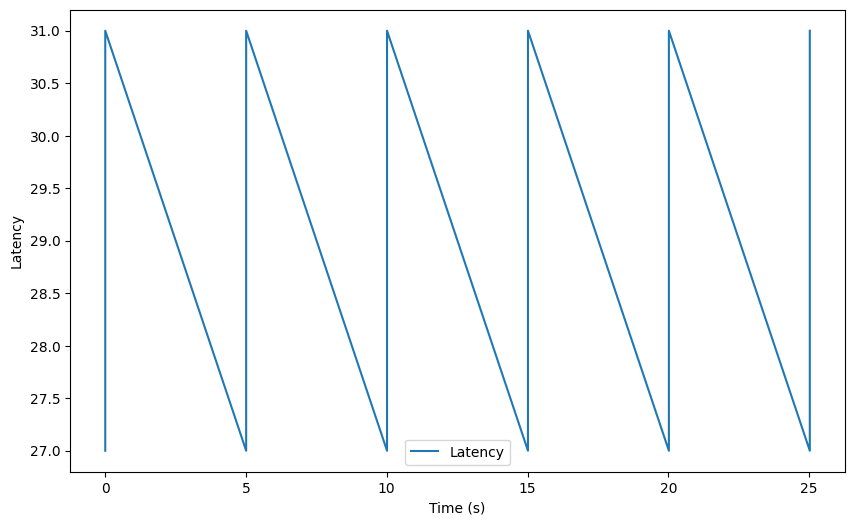

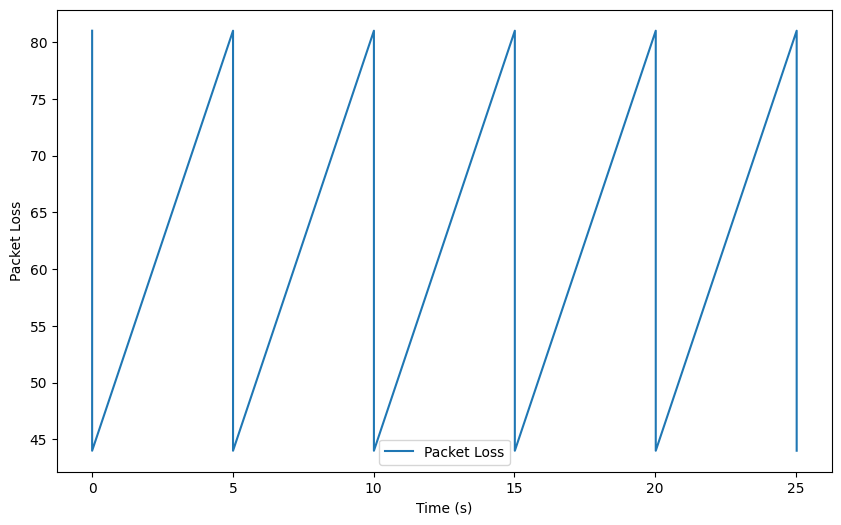

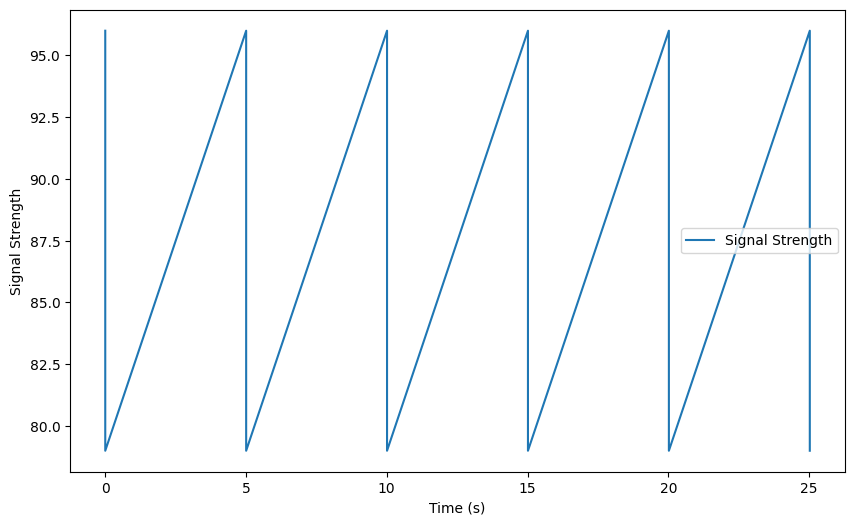

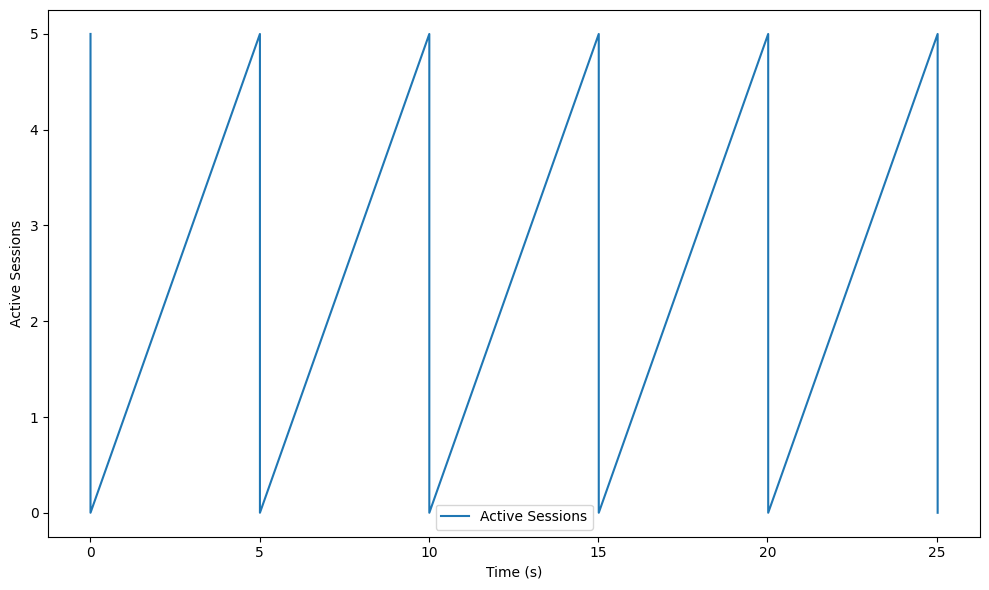

In [45]:
# second project code
import time
import random
import matplotlib.pyplot as plt

class Connection:
    def __init__(self, name):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0
        self.unhealthy_threshold = 3
        self.health_check_failures = 0
        self.cooldown_period = 5
        self.last_unhealthy_time = 0

    # Add the calculate_qos_score method
    def calculate_qos_score(self):
        return self.latency + self.packet_loss - self.signal_strength

    def start_session(self):
        try:
            self.active_sessions += 1
            self.update_qos_metrics()
        except Exception as e:
            print(f"Failed to start session on {self.name}: {str(e)}")

    def end_session(self):
        try:
            if self.active_sessions > 0:
                self.active_sessions -= 1
                self.update_qos_metrics()
            else:
                print(f"No active sessions to end on {self.name}")
        except Exception as e:
            print(f"Failed to end session on {self.name}: {str(e)}")

    def is_unhealthy(self):
        # If connection is in cooldown period, consider it as unhealthy
        if time.time() - self.last_unhealthy_time < self.cooldown_period:
            return True
        # If number of consecutive health check failures is above the threshold, consider connection as unhealthy
        elif self.health_check_failures >= self.unhealthy_threshold:
            self.last_unhealthy_time = time.time()
            return True
        return False

    def update_health_check_result(self, success):
        # If health check is successful, reset failures counter
        # If health check fails, increment failures counter
        self.health_check_failures = 0 if success else self.health_check_failures + 1


    def reset(self):
        try:
            # Simulate reconnection by randomizing parameters again
            self.latency = random.randint(1, 100)
            self.packet_loss = random.randint(1, 100)
            self.signal_strength = random.randint(1, 100)
            self.active_sessions = 0
            print(f"Connection {self.name} has been reset.")
        except Exception as e:
            print(f"Failed to reset {self.name}: {str(e)}")

    def migrate_sessions(self, target_connection):
        try:
            target_connection.active_sessions += self.active_sessions
            self.active_sessions = 0
            print(f"Migrated sessions from {self.name} to {target_connection.name}")
        except Exception as e:
            print(f"Failed to migrate sessions from {self.name} to {target_connection.name}: {str(e)}")

    def update_qos_metrics(self):
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions
   
    MAX_SESSIONS = 10  # Maximum sessions a connection can handle

    def is_overloaded(self):
        # A connection is considered overloaded if it has too many active sessions
        return self.active_sessions >= self.MAX_SESSIONS

    def get_weight(self):
        # Inverse of QoS score is used as weight
        # Add a small constant to avoid division by zero
        return 1.0 / (self.calculate_qos_score() + 0.0001)
    def can_handle_session(self, session):
        # A simple example: a connection can handle a session if it is not overloaded and not unhealthy
        return not self.is_overloaded() and not self.is_unhealthy()

class Session:
    # New class to represent sessions
    def __init__(self, priority=1):
        # Priority 1 by default
        self.priority = priority


class LoadBalancer:
    def __init__(self):
        self.connections = []
        self.session_queue = []  # Queue for sessions waiting for a connection
        self.connection_count = 0  # Keeps track of total number of connections

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection
    # Update method to use the connection's calculate_qos_score method
    def calculate_qos_score(self, connection):
        return connection.calculate_qos_score()
   
    def get_best_connection_for_session(self, session):
        try:
            # Exclude connections which can't handle the session
            viable_connections = [connection for connection in self.connections if connection.can_handle_session(session)]
            # Choose the connection with highest weight
            return max(viable_connections, key=lambda connection: connection.get_weight(), default=None)
        except Exception as e:
            print("Error in getting best connection for session: " + str(e))
            return None

    def start_session(self, session):
        best_connection = self.get_best_connection_for_session(session)
        if best_connection:
            best_connection.active_sessions += 1
            print(f"Started session on {best_connection.name}")
        else:
            # No viable connection available, add session to the queue
            self.session_queue.append(session)
            print("No viable connection available. Session added to the queue.")

    def handle_queued_sessions(self):
        # Try to start sessions from the queue
        for session in self.session_queue[:]:
            best_connection = self.get_best_connection_for_session(session)
            if best_connection:
                best_connection.active_sessions += 1
                self.session_queue.remove(session)
                print(f"Started queued session on {best_connection.name}")
            else:
                # Stop if no viable connection is found (we assume that sessions in the queue are sorted by priority)
                break

    def end_session(self, connection_name):
        try:
            found = False
            for connection in self.connections:
                if connection.name == connection_name:
                    connection.end_session()
                    print(f"Ended session on {connection.name}")
                    found = True
                    break
            if not found:
                print(f"No active connection named {connection_name}")
        except Exception as e:
            print(f"Failed to end session on {connection_name}: {str(e)}")

    def handle_unhealthy_connection(self, connection):
        try:
            # Get sessions to migrate, sorted by priority (higher priority first)
            sessions_to_migrate = sorted(connection.active_sessions, key=lambda session: session.priority, reverse=True)
            for session in sessions_to_migrate:
                # Get best connection for each session
                target_connection = self.get_best_connection_for_session(session)
                if target_connection:
                    connection.migrate_session(target_connection, session)
                else:
                    print(f"Failed to migrate session with priority {session.priority}. No viable connection available.")
            connection.reset()
        except Exception as e:
            print(f"Failed to handle unhealthy connection {connection.name}: {str(e)}")


    def monitor_connections(self):
        try:
            for connection in self.connections:
                health_check_success = random.choice([True, False])
                connection.update_health_check_result(health_check_success)
                print(f"Monitoring {connection.name}: "
                      f"Latency: {connection.latency} ms, "
                      f"Packet Loss: {connection.packet_loss}%, "
                      f"Signal Strength: {connection.signal_strength}, "
                      f"Active Sessions: {connection.active_sessions}")
                self.scale_down()  # Check if we can scale down after each monitoring cycle
                if connection.is_unhealthy():
                    print(f"{connection.name} is unhealthy!")
                    self.handle_unhealthy_connection(connection)
        except Exception as e:
            print(f"Failed to monitor connections: {str(e)}")
        self.handle_queued_sessions()  # Handle queued sessions after monitoring connections

    def get_healthiest_connection(self):
        healthy_connections = [connection for connection in self.connections if not connection.is_unhealthy()]
        return min(healthy_connections, key=self.calculate_qos_score, default=None)


    def scale_up(self):
        self.connection_count += 1
        new_connection = Connection(f"Connection{self.connection_count}")
        self.connections.append(new_connection)
        print(f"Scaled up! Added {new_connection.name}")

    def assign_session(self, session):
        try:
            best_connection = self.get_best_connection_for_session(session)
            if best_connection is not None:
                best_connection.start_session(session)
                print(f"Assigned session {session.id} to {best_connection.name}")
            else:
                print("No viable connection available. Scaling up...")
                self.scale_up()
                self.assign_session(session)  # Retry assigning the session
        except Exception as e:
            print("Error in assigning session: " + str(e))

    def scale_down(self):
        # Ensure that there are at least two connections before scaling down
        if len(self.connections) > 2:
            # Find the least utilized connection (i.e., with the fewest active sessions)
            least_utilized_connection = min(self.connections, key=lambda c: c.active_sessions)
            # Only scale down if no active sessions
            if least_utilized_connection.active_sessions == 0:
                self.connections.remove(least_utilized_connection)
                print(f"Scaled down! Removed {least_utilized_connection.name}")

# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer
load_balancer.add_connection(Connection("Connection1"))
load_balancer.add_connection(Connection("Connection2"))
load_balancer.add_connection(Connection("Connection3"))
load_balancer.add_connection(Connection("Connection4"))

# Start sessions with different priorities, best connection will be selected
for priority in range(1, 6):  # Start sessions with priority 1 to 5
    load_balancer.start_session(Session(priority))
start_time = time.time()
monitoring_duration = 30  # Monitoring duration in seconds 

timestamps = []
latencies = []
packet_losses = []
signal_strengths = []
active_sessions = []

while time.time() - start_time < monitoring_duration:
    load_balancer.monitor_connections()
    for connection in load_balancer.connections:
        health_check_success = random.choice([True, False])
        connection.update_health_check_result(health_check_success)
        timestamps.append(time.time() - start_time)
        latencies.append(connection.latency)
        packet_losses.append(connection.packet_loss)
        signal_strengths.append(connection.signal_strength)
        active_sessions.append(connection.active_sessions)
    load_balancer.handle_queued_sessions()
    time.sleep(5)

print("Monitoring stopped after 1 minute.")

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(timestamps, latencies, label='Latency')
plt.xlabel('Time (s)')
plt.ylabel('Latency')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(timestamps, packet_losses, label='Packet Loss')
plt.xlabel('Time (s)')
plt.ylabel('Packet Loss')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(timestamps, signal_strengths, label='Signal Strength')
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(timestamps, active_sessions, label='Active Sessions')
plt.xlabel('Time (s)')
plt.ylabel('Active Sessions')
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
import time
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Connection:
    def __init__(self, name):
        self.name = name
        self.latency = random.randint(1, 100)
        self.packet_loss = random.randint(1, 100)
        self.signal_strength = random.randint(1, 100)
        self.active_sessions = 0
        self.unhealthy_threshold = 3
        self.health_check_failures = 0
        self.cooldown_period = 5
        self.last_unhealthy_time = 0

    # Add the calculate_qos_score method
    def calculate_qos_score(self):
        return self.latency + self.packet_loss - self.signal_strength

    def start_session(self):
        try:
            self.active_sessions += 1
            self.update_qos_metrics()
        except Exception as e:
            print(f"Failed to start session on {self.name}: {str(e)}")

    def end_session(self):
        try:
            if self.active_sessions > 0:
                self.active_sessions -= 1
                self.update_qos_metrics()
            else:
                print(f"No active sessions to end on {self.name}")
        except Exception as e:
            print(f"Failed to end session on {self.name}: {str(e)}")

    def is_unhealthy(self):
        # If connection is in cooldown period, consider it as unhealthy
        if time.time() - self.last_unhealthy_time < self.cooldown_period:
            return True
        # If number of consecutive health check failures is above the threshold, consider connection as unhealthy
        elif self.health_check_failures >= self.unhealthy_threshold:
            self.last_unhealthy_time = time.time()
            return True
        return False

    def update_health_check_result(self, success):
        # If health check is successful, reset failures counter
        # If health check fails, increment failures counter
        self.health_check_failures = 0 if success else self.health_check_failures + 1


    def reset(self):
        try:
            # Simulate reconnection by randomizing parameters again
            self.latency = random.randint(1, 100)
            self.packet_loss = random.randint(1, 100)
            self.signal_strength = random.randint(1, 100)
            self.active_sessions = 0
            print(f"Connection {self.name} has been reset.")
        except Exception as e:
            print(f"Failed to reset {self.name}: {str(e)}")

    def migrate_sessions(self, target_connection):
        try:
            target_connection.active_sessions += self.active_sessions
            self.active_sessions = 0
            print(f"Migrated sessions from {self.name} to {target_connection.name}")
        except Exception as e:
            print(f"Failed to migrate sessions from {self.name} to {target_connection.name}: {str(e)}")

    def update_qos_metrics(self):
        self.latency += self.active_sessions
        self.packet_loss += self.active_sessions
        self.signal_strength -= self.active_sessions
   
    MAX_SESSIONS = 10  # Maximum sessions a connection can handle

    def is_overloaded(self):
        # A connection is considered overloaded if it has too many active sessions
        return self.active_sessions >= self.MAX_SESSIONS

    def get_weight(self):
        # Inverse of QoS score is used as weight
        # Add a small constant to avoid division by zero
        return 1.0 / (self.calculate_qos_score() + 0.0001)
    
    def can_handle_session(self, session):
        # A simple example: a connection can handle a session if it is not overloaded and not unhealthy
        return not self.is_overloaded() and not self.is_unhealthy()

class Session:
    # New class to represent sessions
    def __init__(self, priority=1):
        # Priority 1 by default
        self.priority = priority


class LoadBalancer:
    def __init__(self):
        self.connections = []
        self.session_queue = []  # Queue for sessions waiting for a connection
        self.connection_count = 0  # Keeps track of total number of connections

    def add_connection(self, connection):
        self.connections.append(connection)

    def get_best_connection(self):
        min_qos_score = float('inf')
        best_connection = None

        for connection in self.connections:
            qos_score = self.calculate_qos_score(connection)
            if qos_score < min_qos_score:
                min_qos_score = qos_score
                best_connection = connection

        return best_connection
    
    # Update method to use the connection's calculate_qos_score method
    def calculate_qos_score(self, connection):
        return connection.calculate_qos_score()
   
    def get_best_connection_for_session(self, session):
        try:
            # Exclude connections which can't handle the session
            viable_connections = [connection for connection in self.connections if connection.can_handle_session(session)]
            # Choose the connection with highest weight
            return max(viable_connections, key=lambda connection: connection.get_weight(), default=None)
        except Exception as e:
            print("Error in getting best connection for session: " + str(e))
            return None

    def start_session(self, session):
        best_connection = self.get_best_connection_for_session(session)
        if best_connection:
            best_connection.active_sessions += 1
            print(f"Started session on {best_connection.name}")
        else:
            # No viable connection available, add session to the queue
            self.session_queue.append(session)
            print("No viable connection available. Session added to the queue.")

    def handle_queued_sessions(self):
        # Try to start sessions from the queue
        for session in self.session_queue[:]:
            best_connection = self.get_best_connection_for_session(session)
            if best_connection:
                best_connection.active_sessions += 1
                self.session_queue.remove(session)
                print(f"Started queued session on {best_connection.name}")
            else:
                # Stop if no viable connection is found (we assume that sessions in the queue are sorted by priority)
                break

    def end_session(self, connection_name):
        try:
            found = False
            for connection in self.connections:
                if connection.name == connection_name:
                    connection.end_session()
                    print(f"Ended session on {connection.name}")
                    found = True
                    break
            if not found:
                print(f"No active connection named {connection_name}")
        except Exception as e:
            print(f"Failed to end session on {connection_name}: {str(e)}")

    def handle_unhealthy_connection(self, connection):
        try:
            # Get sessions to migrate, sorted by priority (higher priority first)
            sessions_to_migrate = sorted(connection.active_sessions, key=lambda session: session.priority, reverse=True)
            for session in sessions_to_migrate:
                # Get best connection for each session
                target_connection = self.get_best_connection_for_session(session)
                if target_connection:
                    connection.migrate_sessions(target_connection, session)
                else:
                    print(f"Failed to migrate session with priority {session.priority}. No viable connection available.")
            connection.reset()
        except Exception as e:
            print(f"Failed to handle unhealthy connection {connection.name}: {str(e)}")


    def monitor_connections(self):
        try:
            for connection in self.connections:
                health_check_success = random.choice([True, False])
                connection.update_health_check_result(health_check_success)
                print(f"Monitoring {connection.name}: "
                      f"Latency: {connection.latency} ms, "
                      f"Packet Loss: {connection.packet_loss}%, "
                      f"Signal Strength: {connection.signal_strength}, "
                      f"Active Sessions: {connection.active_sessions}")
                self.scale_down()  # Check if we can scale down after each monitoring cycle
                if connection.is_unhealthy():
                    print(f"{connection.name} is unhealthy!")
                    self.handle_unhealthy_connection(connection)
        except Exception as e:
            print(f"Failed to monitor connections: {str(e)}")
        self.handle_queued_sessions()  # Handle queued sessions after monitoring connections

    def get_healthiest_connection(self):
        healthy_connections = [connection for connection in self.connections if not connection.is_unhealthy()]
        return min(healthy_connections, key=self.calculate_qos_score, default=None)


    def scale_up(self):
        self.connection_count += 1
        new_connection = Connection(f"Connection{self.connection_count}")
        self.connections.append(new_connection)
        print(f"Scaled up! Added {new_connection.name}")

    def assign_session(self, session):
        try:
            best_connection = self.get_best_connection_for_session(session)
            if best_connection is not None:
                best_connection.start_session(session)
                print(f"Assigned session {session.id} to {best_connection.name}")
            else:
                print("No viable connection available. Scaling up...")
                self.scale_up()
                self.assign_session(session)  # Retry assigning the session
        except Exception as e:
            print("Error in assigning session: " + str(e))

    def scale_down(self):
        # Ensure that there are at least two connections before scaling down
        if len(self.connections) > 2:
            # Find the least utilized connection (i.e., with the fewest active sessions)
            least_utilized_connection = min(self.connections, key=lambda c: c.active_sessions)
            # Only scale down if no active sessions
            if least_utilized_connection.active_sessions == 0:
                self.connections.remove(least_utilized_connection)
                print(f"Scaled down! Removed {least_utilized_connection.name}")

# Initialize LoadBalancer
load_balancer = LoadBalancer()

# Add connections to the LoadBalancer
load_balancer.add_connection(Connection("Connection1"))
load_balancer.add_connection(Connection("Connection2"))
load_balancer.add_connection(Connection("Connection3"))
load_balancer.add_connection(Connection("Connection4"))

timestamps = []
latencies = []
packet_losses = []
signal_strengths = []
active_sessions = []

def update_plots(frame):
    load_balancer.monitor_connections()

    for connection in load_balancer.connections:
        health_check_success = random.choice([True, False])
        connection.update_health_check_result(health_check_success)
        timestamps.append(time.time())
        latencies.append(connection.latency)
        packet_losses.append(connection.packet_loss)
        signal_strengths.append(connection.signal_strength)
        active_sessions.append(connection.active_sessions)
    load_balancer.handle_queued_sessions()

    plt.subplot(2, 2, 1)
    plt.plot(timestamps, latencies, label='Latency')
    plt.xlabel('Time (s)')
    plt.ylabel('Latency')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(timestamps, packet_losses, label='Packet Loss')
    plt.xlabel('Time (s)')
    plt.ylabel('Packet Loss')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(timestamps, signal_strengths, label='Signal Strength')
    plt.xlabel('Time (s)')
    plt.ylabel('Signal Strength')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(timestamps, active_sessions, label='Active Sessions')
    plt.xlabel('Time (s)')
    plt.ylabel('Active Sessions')
    plt.legend()

    plt.tight_layout()

fig = plt.figure(figsize=(12, 8))
ani = FuncAnimation(fig, update_plots, interval=5000, cache_frame_data=False)  # Adjust the interval as needed (e.g., 5000 ms = 5 seconds)

plt.show()

<Figure size 1200x800 with 0 Axes>